    人均GDP  城镇人口比重  交通工具消费价格指数  百户拥有汽车量
0    8.05   86.20       95.92    37.71
1    8.34   80.50      103.57    20.62
2    3.39   45.60       99.03    23.32
3    3.13   49.68       98.96    18.60
4    5.79   56.62       99.11    19.62
5    5.07   64.05      100.12    11.15
6    3.84   53.40       97.15    11.24
7    3.28   56.50      100.54     5.29
8    8.18   89.30      101.58    18.15
9    6.22   61.90       98.95    23.92
10   5.92   62.30       96.69    33.85
11   2.56   44.80      100.25     9.20
12   4.72   58.10      100.75    17.83
13   2.61   45.70      100.91     8.88
14   4.71   50.95       98.50    28.12
15   2.87   40.57      100.59    14.06
16   3.41   51.83      101.15     9.69
17   2.98   45.10      100.02    12.82
18   5.07   66.50       97.55    30.71
19   2.52   41.80      102.28    17.24
20   2.88   50.50      102.26    15.82
21   3.43   55.02       99.12    10.44
22   2.61   41.83       99.76    12.52
23   1.64   34.96      100.71    10.48
24   1.92   36.80       9

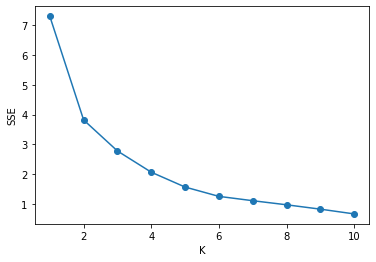

[1 2 0 0 1 0 0 0 2 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]


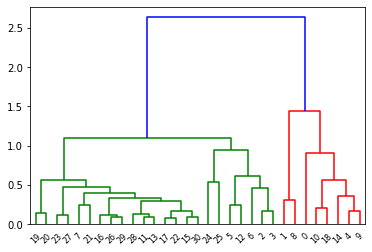

In [1]:
# 使用KMeans进行聚类
from sklearn.cluster import KMeans
from sklearn import preprocessing
import pandas as pd
import numpy as np

# 数据加载
data = pd.read_csv('car_data.csv', encoding = 'gbk')
train_x = data[["人均GDP","城镇人口比重","交通工具消费价格指数", "百户拥有汽车量"]]
print(train_x)

# 规范化到 [0,1] 空间
min_max_scaler = preprocessing.MinMaxScaler()
train_x = min_max_scaler.fit_transform(train_x)
# pd.DataFrame(train_x).to_csv('temp.csv', index=False) # 为了使用to_csv，转换为pd.DataFrame
print(train_x)

# 使用KMeans聚类
kmeans = KMeans(n_clusters=3)
# kmeans.fit(train_x)
predict_y = kmeans.fit_predict(train_x) # fit和predict联合使用
# 合并聚类结果，插入到原数据中
result = pd.concat((data,pd.DataFrame(predict_y)),axis=1)
result.rename({0:u'聚类结果'},axis=1,inplace=True)
print(result)
# 将结果导出到CSV文件中
result.to_csv("car_data_cluster_result.csv",index=False)

# K-Means 手肘法：统计不同K取值的误差平方和
import matplotlib.pyplot as plt
sse = []
for k in range(1, 11):
    # kmeans算法
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(train_x)
    # 计算inertia簇内误差平方和
    sse.append(kmeans.inertia_)
x = range(1, 11)
plt.xlabel('K')
plt.ylabel('SSE')
plt.plot(x, sse, 'o-')
plt.show()

# 使用层次聚类
from scipy.cluster.hierarchy import dendrogram, ward
from sklearn.cluster import KMeans, AgglomerativeClustering
import matplotlib.pyplot as plt
model = AgglomerativeClustering(linkage='ward', n_clusters=3)
y = model.fit_predict(train_x)
print(y)

linkage_matrix = ward(train_x)
dendrogram(linkage_matrix)
plt.show()

